In [1]:
from loadingCGAN.cgan import Cgan, switching_gans
from loadingCGAN.mlp import Mlp
from evaluation.evaluation import evaluate
import numpy as np
from load_data.load_data import load_data

# Parameters
attack_mode = None
epochs = 10
number_of_gans = 1
number_of_switch = 1

# DATA
x_train, y_train, x_balanced_train, y_balanced_train, x_test, y_test = load_data(verbose=False)
data_dim = x_train.shape[1]
print("\n"*2)
print("Train data shape is {}".format(x_balanced_train.shape))
print("\n "*2)

Using TensorFlow backend.
/home/peseux/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/peseux/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)





Train data shape is (117260, 122)

 
 


In [2]:
y_balanced_train.sum() / y_balanced_train.shape[0]

0.5

In [5]:
########
# CGAN #
########


cgans = [Cgan(data_dim=data_dim, spectral_normalisation=False, batch_size=512) for _ in range(number_of_gans)]
for _ in range(number_of_switch):
    for cgan in cgans:
        cgan.train(x_train=x_balanced_train, # x_train,
                   y_train=y_balanced_train, # ,y_train
                   epochs=epochs,
                   print_recap=False,
                   reload_images_p=.99,
                   show_past_p=.95)
    if number_of_gans > 1:
        switching_gans(cgans)

CHOSEN OPTIMIZER IS ADAM

 
 Discriminator Architecture 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 18)                2214      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 18)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 12)                228       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 12)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                130       
_________________________________________________________________
leaky_re_lu_8 (Leak

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
Use tf.cast instead.


/home/peseux/.local/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
100%|██████████| 10/10 [00:13<00:00,  1.02s/it]


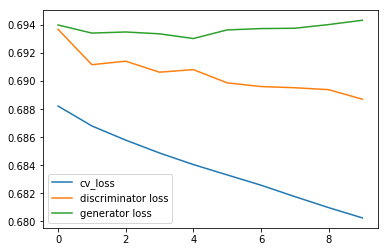

True

In [6]:
cgan = cgans[0]
cgan.plot_learning()

In [8]:
result_cgan = evaluate(y_true=y_test, y_pred=cgan.predict(x=x_test))

In [9]:
x = x_test[:100]

In [10]:
ones = np.ones((x.shape[0], 1))
zeros = np.zeros((x.shape[0], 1))
y_pred_ones = cgan.discriminator.predict([x, ones])
y_pred_zeros = cgan.discriminator.predict([x, zeros])

In [11]:
y_pred_ones

array([[0.5043303 ],
       [0.5043929 ],
       [0.50534666],
       [0.5038041 ],
       [0.50546634],
       [0.5075333 ],
       [0.50580394],
       [0.50571805],
       [0.50750536],
       [0.50627196],
       [0.5050379 ],
       [0.5071668 ],
       [0.504412  ],
       [0.5061762 ],
       [0.5079157 ],
       [0.5074517 ],
       [0.5075925 ],
       [0.5073804 ],
       [0.504729  ],
       [0.5043633 ],
       [0.5041451 ],
       [0.5065681 ],
       [0.50759643],
       [0.507404  ],
       [0.5042954 ],
       [0.5058663 ],
       [0.5075311 ],
       [0.5076016 ],
       [0.5046041 ],
       [0.50476044],
       [0.50798917],
       [0.50745606],
       [0.5073992 ],
       [0.5046486 ],
       [0.5030768 ],
       [0.50605315],
       [0.50760144],
       [0.5080879 ],
       [0.50522655],
       [0.50564814],
       [0.5061889 ],
       [0.50736594],
       [0.5073737 ],
       [0.50756824],
       [0.5050444 ],
       [0.5075778 ],
       [0.5051077 ],
       [0.507

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.DataFrame(x_train)

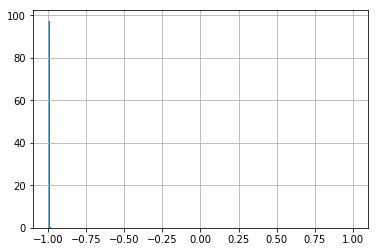

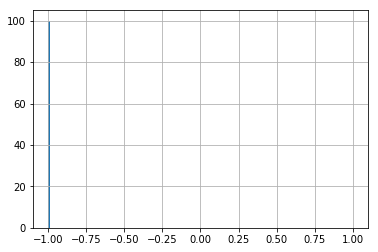

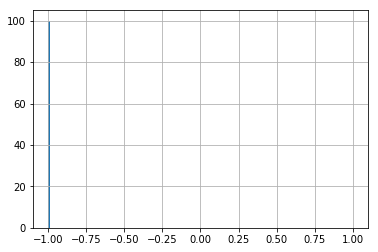

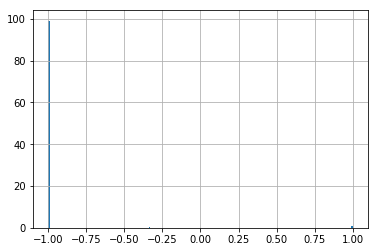

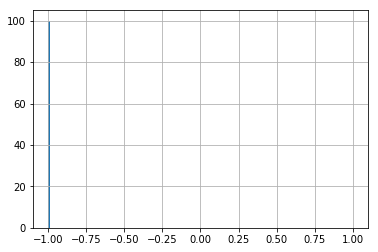

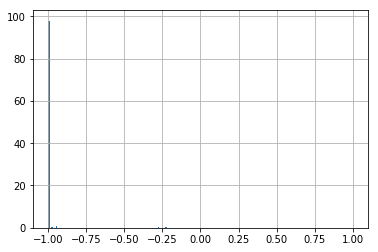

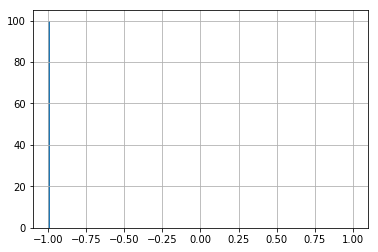

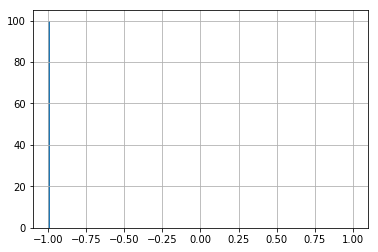

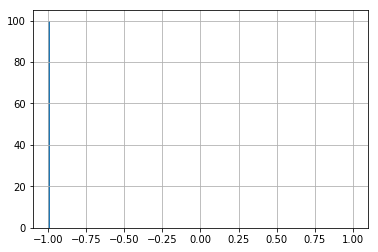

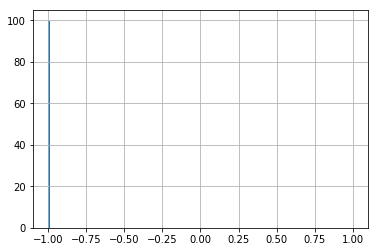

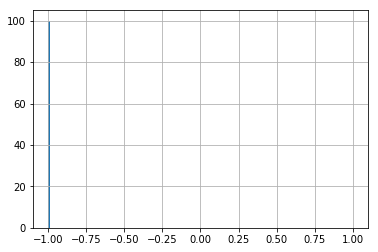

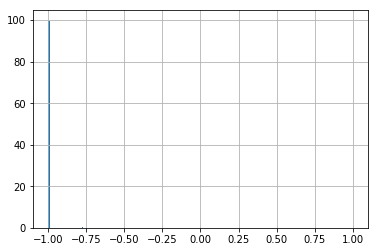

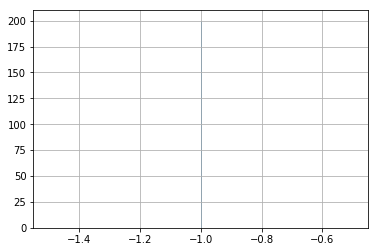

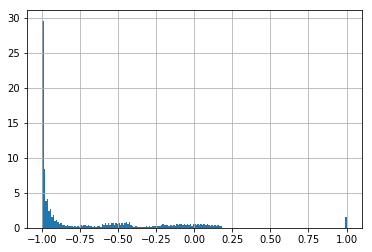

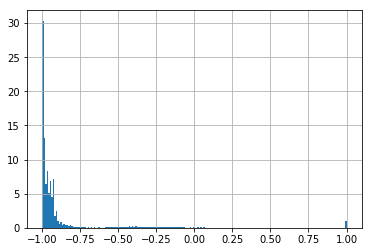

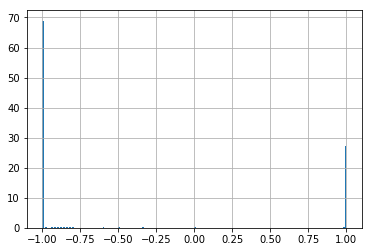

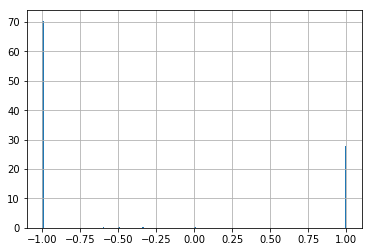

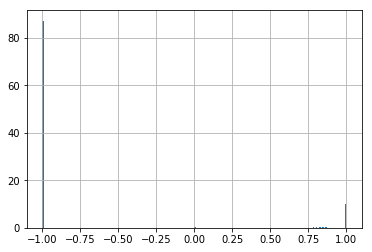

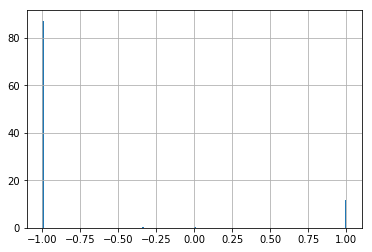

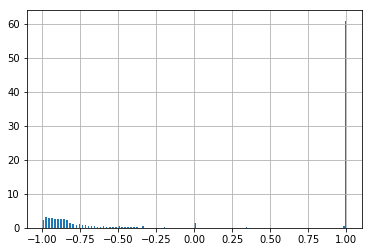

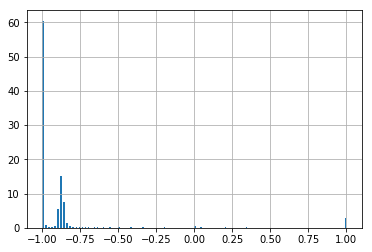

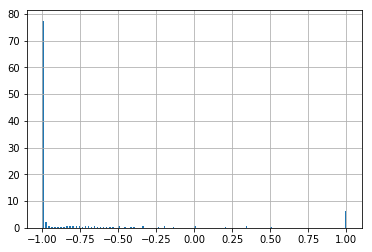

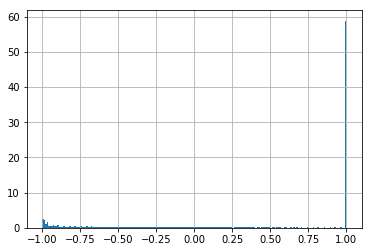

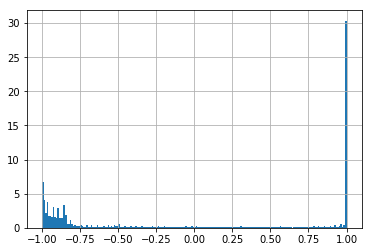

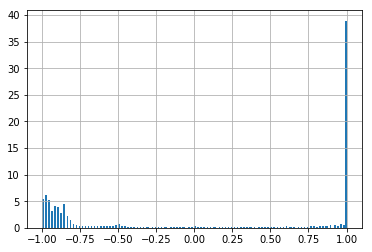

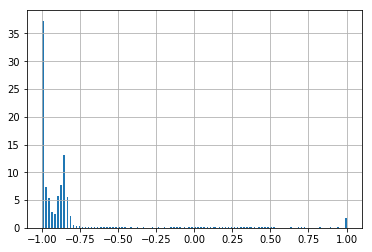

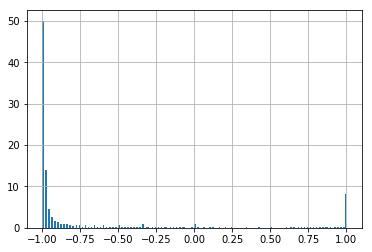

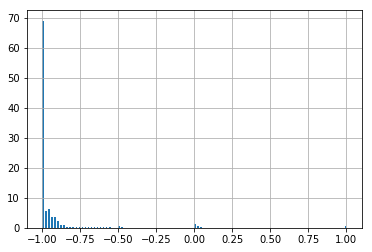

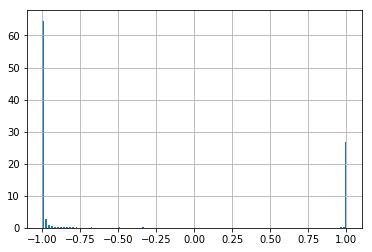

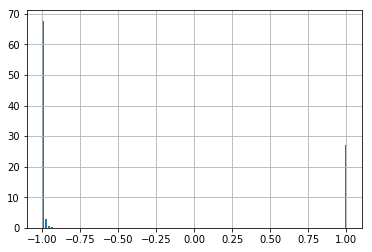

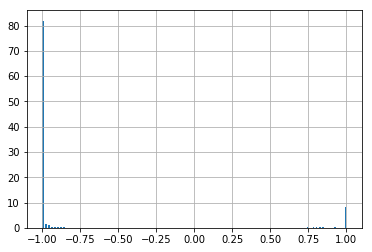

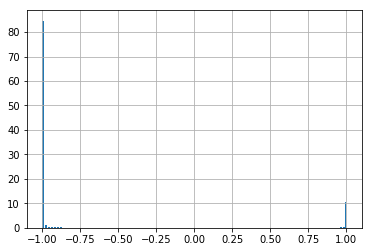

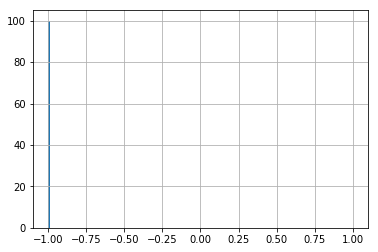

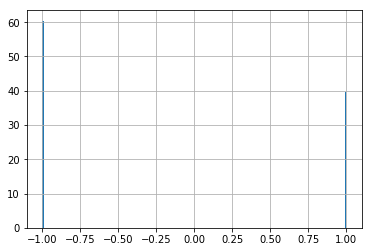

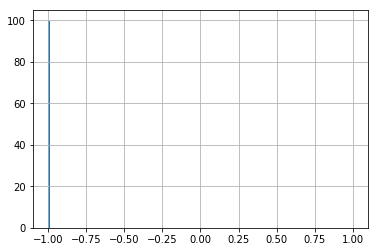

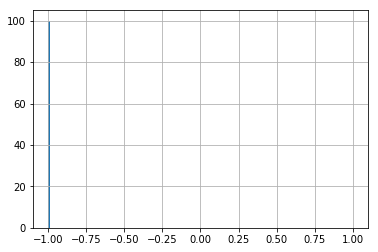

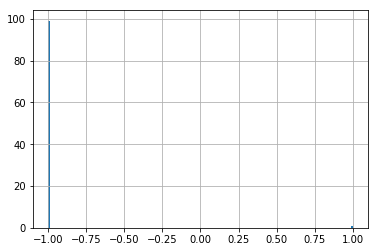

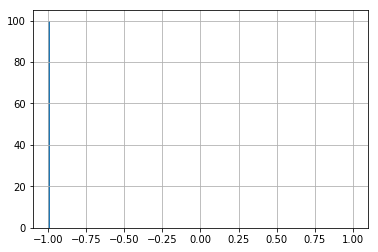

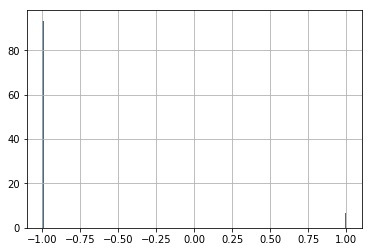

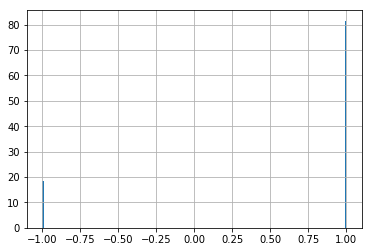

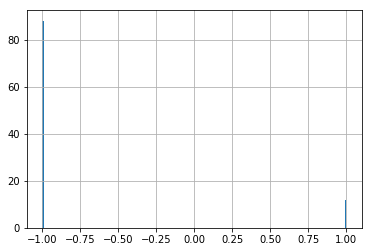

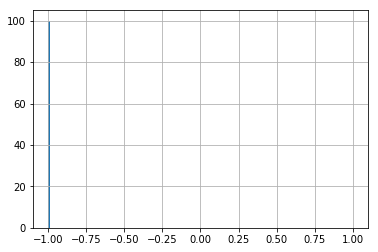

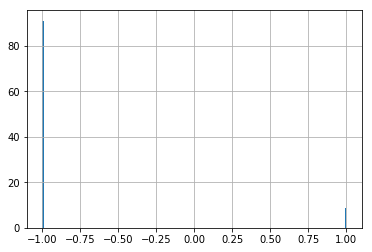

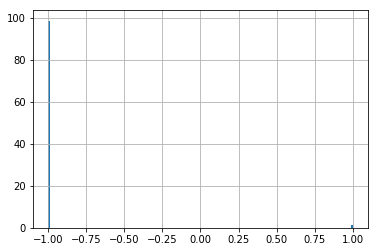

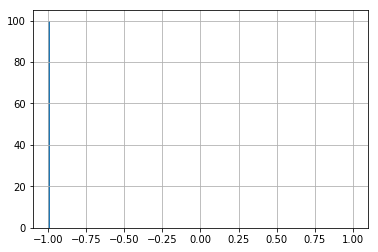

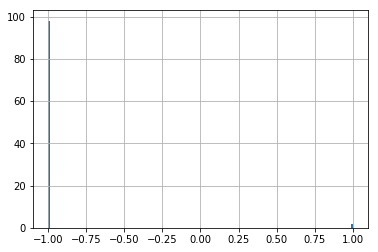

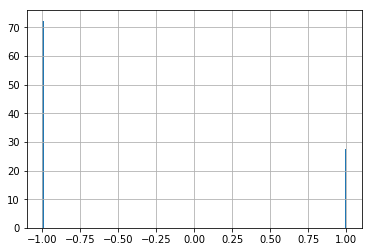

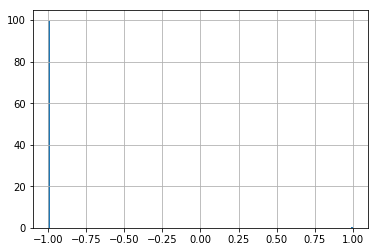

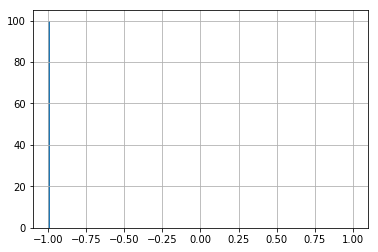

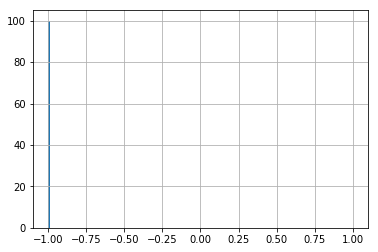

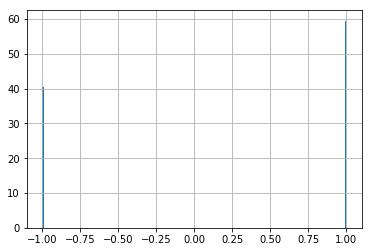

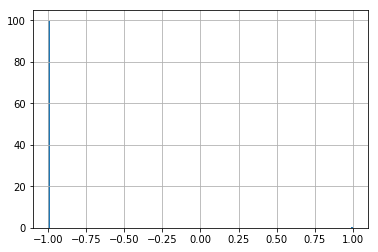

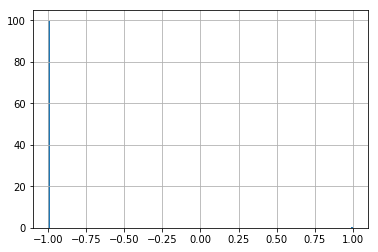

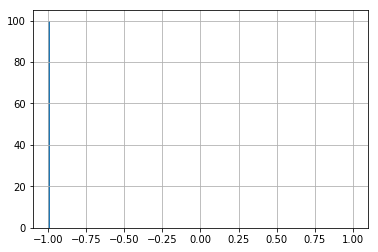

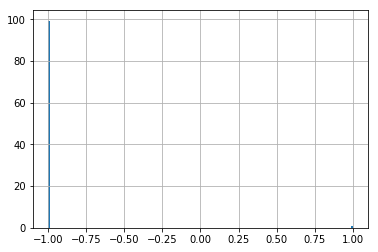

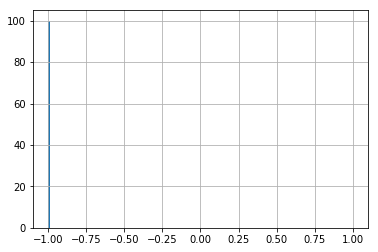

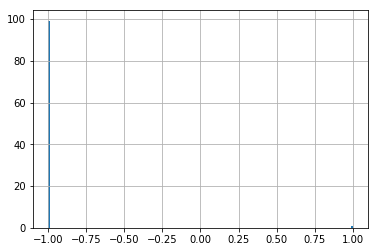

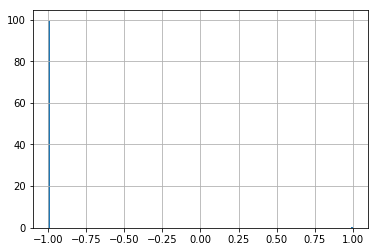

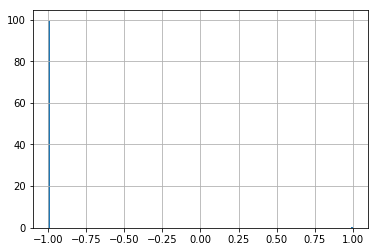

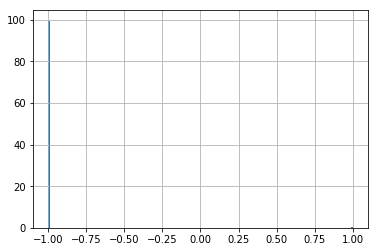

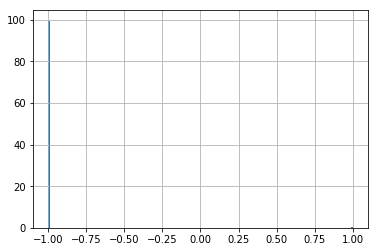

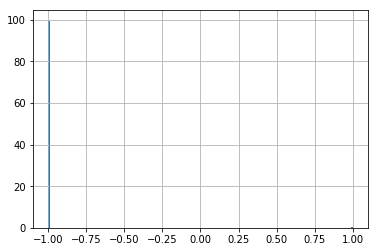

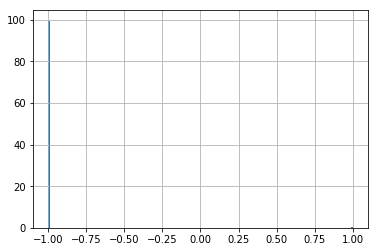

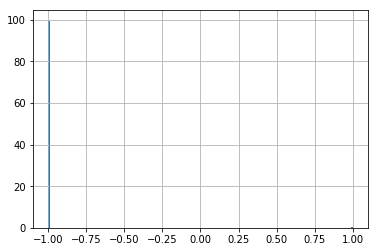

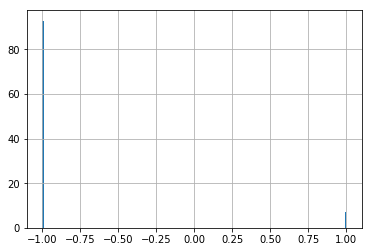

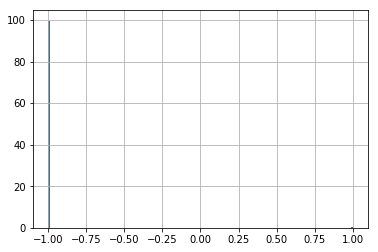

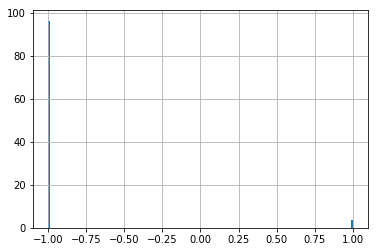

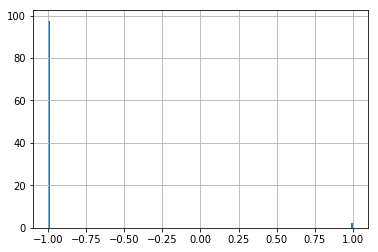

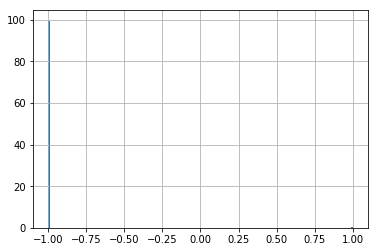

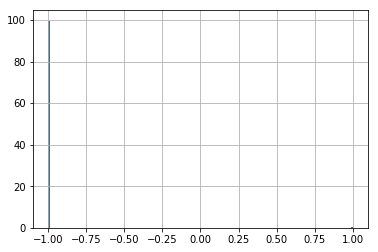

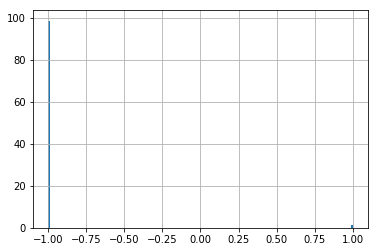

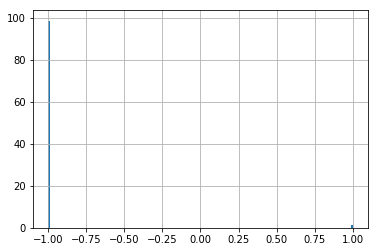

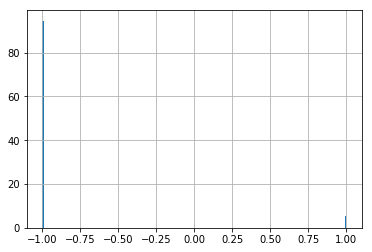

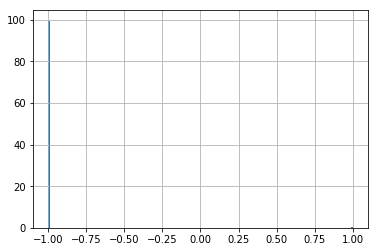

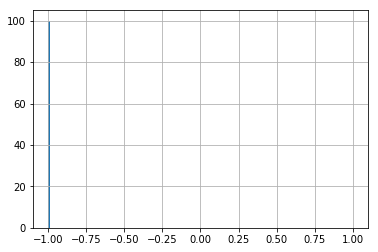

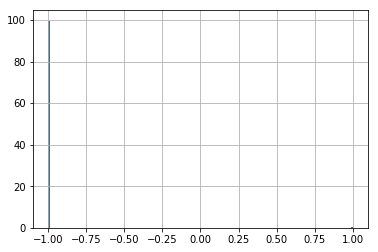

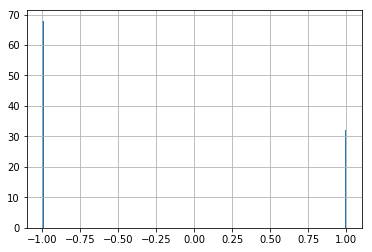

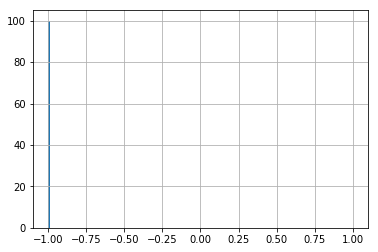

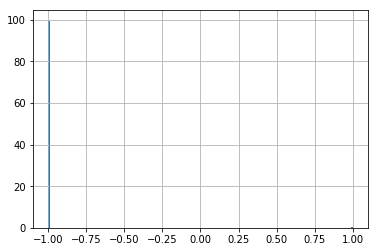

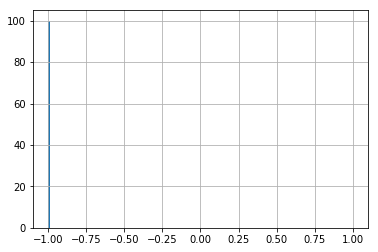

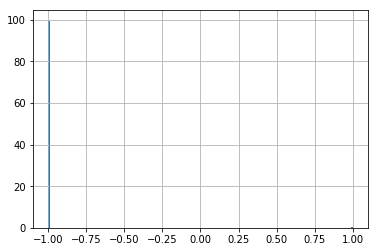

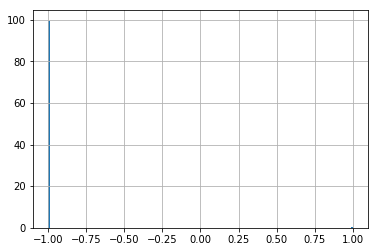

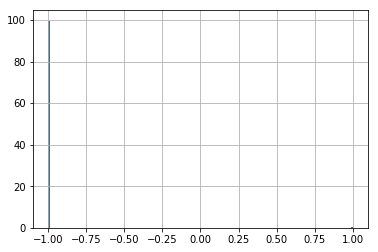

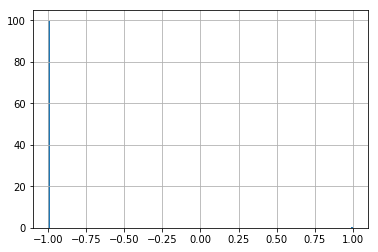

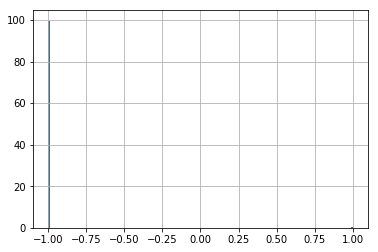

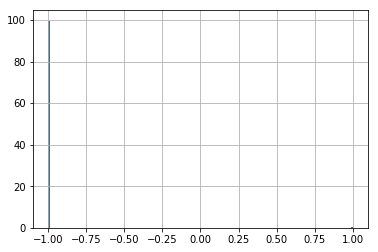

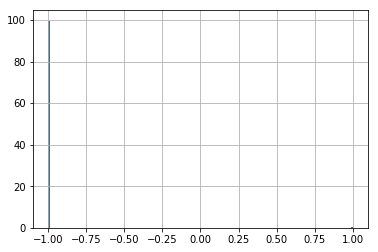

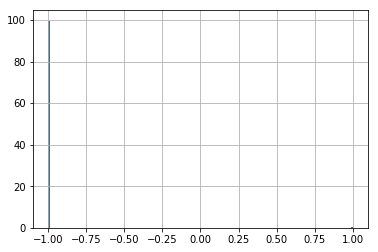

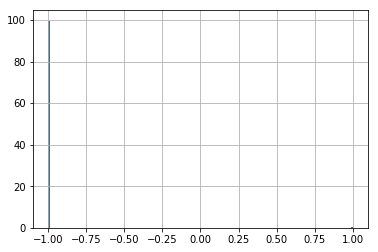

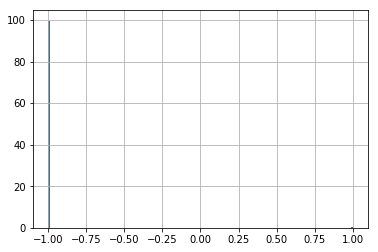

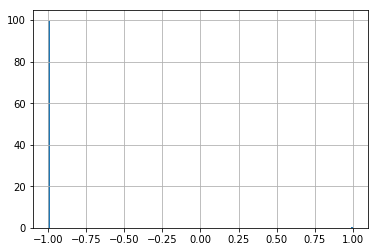

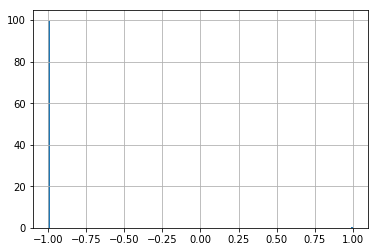

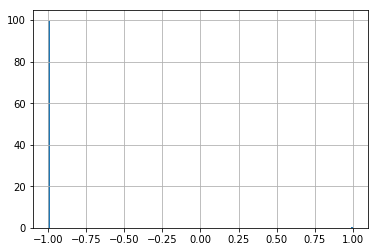

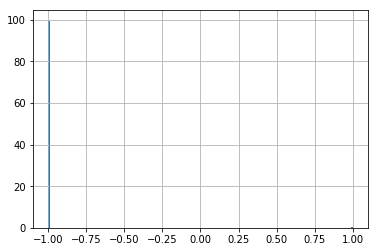

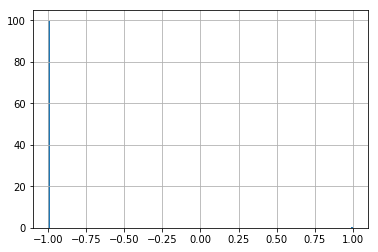

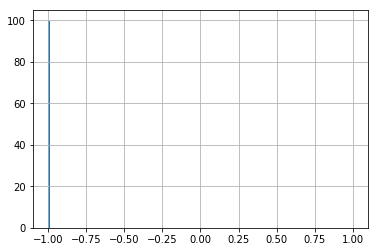

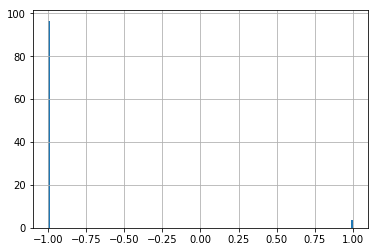

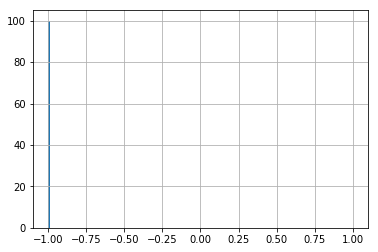

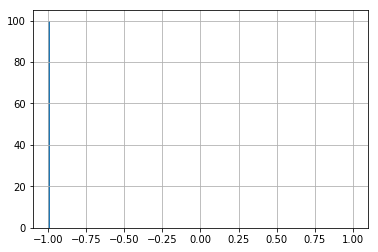

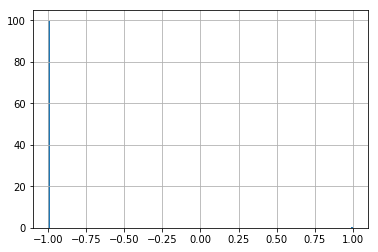

In [25]:

for i in range(100):
    df[i].hist(bins=200, density=True)
    plt.show()
    plt.close()

In [8]:
y_pred = [false_or_true([y0[0], y1[0]]) for y0, y1 in zip(y_pred_zeros, y_pred_ones)]

NameError: name 'false_or_true' is not defined

In [ ]:
generated_one = cgan.generate(number=100, labels=np.ones(100))
generated_zero = cgan.generate(number=100, labels=np.zeros(100))
#############
# Classical #
#############
mlp = Mlp(data_dim=data_dim)
d_loss_classical = mlp.train(x_train=x_balanced_train, y_train=y_balanced_train, epochs=epochs*number_of_switch)

result_mlp = evaluate(y_true=y_test, y_pred=mlp.predict(x=x_test))
result_mlp_fooling = evaluate(y_true=np.zeros(100+100), y_pred=mlp.predict(np.concatenate((generated_one, generated_zero))))


print(result_cgan)

print(result_mlp)

print(result_mlp_fooling)